In [56]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

series = read_csv('monthly-milk-production-pounds.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
series.head()

C:\Users\jonat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Month
1962-01-01    589
1962-02-01    561
1962-03-01    640
1962-04-01    656
1962-05-01    727
Name: MonthlyMilk, dtype: int64

In [57]:
# Create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))


     t-1  t+1
0    NaN  589
1  589.0  561
2  561.0  640
3  640.0  656
4  656.0  727


In [58]:
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.70)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# persistence model
def model_persistence(x):
    return x

In [59]:
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_scoreMSE = mean_squared_error(test_y, predictions)
training_scoreMSE = mean_squared_error(train_X, train_y)
r2ScoreTest = r2_score(test_y, predictions)
r2ScoreTraining = r2_score(train_X, train_y)
print('Test MSE: %.3f' % test_scoreMSE)
print('Training MSE: %.3f' % training_scoreMSE)
print('Test R^2: %.3f' % r2ScoreTest)
print('Training R^2: %.3f' % r2ScoreTraining)

Test MSE: 2203.784
Training MSE: 1988.267
Test R^2: 0.390
Training R^2: 0.738


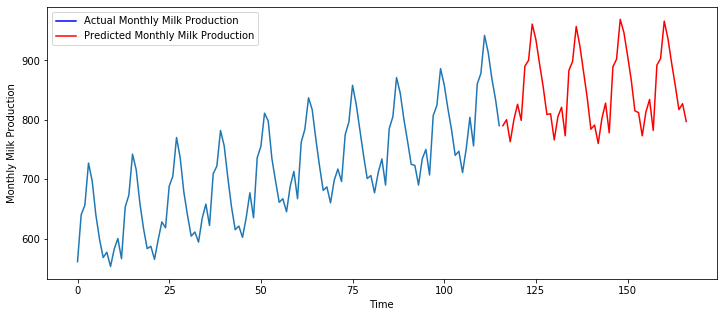

In [60]:
# plot predictions and expected results
fig, ax = plt.subplots(1, 1, figsize=(12, 5))

ax.plot(train_y)
ax.plot([None for i in train_y] + [x for x in test_y],color = 'blue', label ="Actual Monthly Milk Production")
ax.plot([None for i in train_y] + [x for x in predictions], color='red', label = 'Predicted Monthly Milk Production')
plt.xlabel('Time')
plt.ylabel('Monthly Milk Production')
plt.legend(loc='best')
plt.show()
